#Anomaly Detection in Credit Card Transactions with DBSCAN

This project demonstrates the use of the DBSCAN (Density-Based Spatial Clustering of Applications with Noise) algorithm to detect anomalies, specifically fraudulent transactions, in a credit card dataset. The project utilizes the Credit Card Fraud Detection dataset from Kaggle, which consists of anonymized transaction data for both fraudulent and non-fraudulent transactions.

##Importing Libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix


## Check the dir in drive for check the dataset already exist

In [98]:
import os

# List files in the specified directory to confirm path
os.listdir('/content/drive/MyDrive/GIthub_Repo_Datasets/')


['creditcard.csv']

## Load the dataset

The Credit Card Fraud Detection dataset can be found on Kaggle. Here’s the link to the dataset:

[https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

This dataset is commonly used for anomaly detection tasks and is well-suited for exploring clustering techniques like DBSCAN.



In [99]:
url = '/content/drive/MyDrive/GIthub_Repo_Datasets/creditcard.csv'
data = pd.read_csv(url)
data = data[:4000]  # Here we use only 4000 data samples

In [100]:
print('length of the dataset : ',len(data))
print('\n',data[:5])

length of the dataset :  4000

    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   



 ## Preparing the Dataset

In [101]:
# Select relevant features (we'll use PCA-transformed features and Amount)
X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.7602651  -0.32276021  1.72910456 ...  0.2542827  -0.09270989
   0.39670282]
 [ 1.12869958 -0.03526491 -0.68549623 ... -0.15074917  0.04845229
  -0.29264006]
 [-0.75918941 -1.39780317  0.951562   ... -0.28250874 -0.24539937
   1.47127638]
 ...
 [ 0.50353615 -1.24560758  0.17568444 ... -0.09342291  0.2931226
   1.38588851]
 [-0.49227583  0.67199646  0.61060162 ... -0.27939268 -0.03574239
  -0.12716586]
 [-0.03294795  0.25301867  0.64700643 ... -1.024049   -0.63405347
  -0.29597112]]


## Applying PCA for Dimensionality Reduction

Since the dataset is large and complex, applying PCA before clustering can help reduce dimensionality and improve the efficiency of DBSCAN.

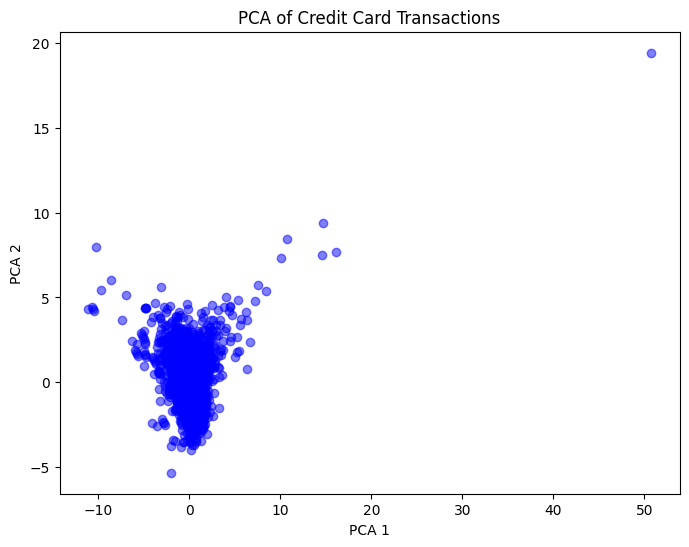

In [102]:
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA of Credit Card Transactions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


## Applying DBSCAN

In [103]:
# Initialize DBSCAN with appropriate parameters
dbscan = DBSCAN(eps=2, min_samples=10)

# Fit the model to the PCA-transformed data
dbscan.fit(X_pca)

# Get the cluster labels
labels = dbscan.labels_


 ## Visualizing the Clusters

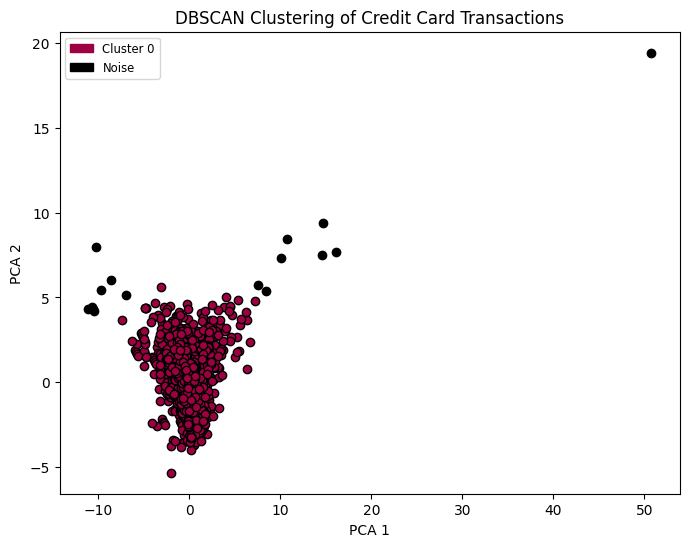

In [104]:
import matplotlib.patches as mpatches

# Plot the DBSCAN results
plt.figure(figsize=(8, 6))

# Unique labels for clusters and noise
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

# Dictionary to store color and label information for the legend
legend_handles = {}

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black color for noise
        col = [0, 0, 0, 1]
        label = 'Noise'
    else:
        label = f'Cluster {k}'

    class_member_mask = (labels == k)
    xy = X_pca[class_member_mask]

    # Plot the clusters
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    # Add legend handle only if it's not already in the legend_handles dictionary
    if label not in legend_handles:
        legend_handles[label] = mpatches.Patch(color=col, label=label)

plt.title('DBSCAN Clustering of Credit Card Transactions')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Add the legend to the plot
plt.legend(handles=legend_handles.values(), loc='best', fontsize='small')

plt.show()


##  Evaluating the Results

In [105]:
# Compare DBSCAN labels to true class labels
true_labels = data['Class'].values

# Adjust for noise points (label -1) which are typically outliers
# In fraud detection, these could be potential fraudulent transactions
dbscan_labels = np.copy(labels)
dbscan_labels[dbscan_labels == -1] = 1  # Label noise as fraudulent

# Confusion Matrix and Classification Report
print('confusion_matrix :\n\n',confusion_matrix(true_labels, dbscan_labels))
print('\n')

print('classification_report :\n\n',classification_report(true_labels, dbscan_labels))

# Exclude the noise label (-1) and count the number of unique clusters
num_clusters = len(unique_labels - {-1})
print('number of clusters :',num_clusters)

confusion_matrix :

 [[3982   16]
 [   2    0]]


classification_report :

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3998
           1       0.00      0.00      0.00         2

    accuracy                           1.00      4000
   macro avg       0.50      0.50      0.50      4000
weighted avg       1.00      1.00      1.00      4000

number of clusters : 1


## Pass new value through the model to test

In [106]:
# Function to classify a new transaction using the trained DBSCAN model
def classify_transaction(transaction_features, scaler, pca, dbscan_model, eps=2):
    # Standardize the transaction using the same scaler
    transaction_scaled = scaler.transform([transaction_features])

    # Apply PCA transformation
    transaction_pca = pca.transform(transaction_scaled)

    # Calculate distances to all core samples
    core_sample_indices = dbscan_model.core_sample_indices_
    core_samples = dbscan_model.components_

    distances = euclidean_distances(transaction_pca, core_samples)
    min_distance = np.min(distances)

    # If the minimum distance is less than or equal to eps, classify as part of a cluster
    if min_distance <= eps:
        return 'authorized'
    else:
        return 'unauthorized'

In [107]:
from sklearn.metrics.pairwise import euclidean_distances

# Example usage with new transaction features (Real label is authorized)
new_transaction_1 = [-3.043540624, -3.157307121, 1.08846278, 2.288643618, 1.35980513,
                     -1.064822523, 0.325574266, -0.067793653, -0.270952836, -0.838586565,
                     -0.414575448, -0.50314086, 0.676501545, -1.692028933, 2.000634839,
                     0.666779696, 0.599717414, 1.725321007, 0.28334483, 2.102338793,
                     0.661695925, 0.435477209, 1.375965743, -0.293803153, 0.279798032,
                     -0.145361715, -0.252773123, 0.035764225, 529]

result_1 = classify_transaction(new_transaction_1, scaler, pca, dbscan)
print("The new transaction 1 is:", result_1)

# Example usage with new transaction features (Real label is unauthorized)
new_transaction_2 = [-18.4748679, 11.58638052, -21.40291681, 6.038515416, -14.45115814,
                     -4.146523506, -14.85612367, 12.43114047, -4.053353287, -9.040396249,
                     5.966202507, -8.46396613, 0.078692132, -9.092532652, 0.010822097,
                     -7.186375508, -13.7974745, -4.95849391, 1.32116656, 1.577924401,
                     1.741135596, -1.251137949, -0.396219126, 0.095705556, 1.322750943,
                     -0.217954565, 1.628792531, 0.482248275, 99.99]

result_2 = classify_transaction(new_transaction_2, scaler, pca, dbscan)
print("The new transaction 2 is:", result_2)


# Example usage with new transaction features (Real label is unauthorized)
new_transaction_3 = [-3.043540624, -3.157307121, 1.08846278, 2.288643618, 1.35980513,
                     -1.064822523, 0.325574266, -0.067793653, -0.270952836, -0.838586565,
                     -0.414575448, -0.50314086, 0.676501545, -1.692028933, 2.000634839,
                     0.666779696, 0.599717414, 1.725321007, 0.28334483, 2.102338793,
                     0.661695925, 0.435477209, 1.375965743, -0.293803153, 0.279798032,
                     -0.145361715, -0.252773123, 0.035764225, 529]

result_3 = classify_transaction(new_transaction_3, scaler, pca, dbscan)
print("The new transaction 3 is:", result_3)

# Example usage with new transaction features (Real label is authorized)
new_transaction_4 = [-1.647247746, 1.627046142, 0.828098227, -1.1927085, -1.218393734,
                     -1.547978485, -0.063064613, 0.635640649, 0.564944973, 0.052423213,
                     -0.250582869, 0.020229954, -0.763352979, 0.314848222, 0.556575,
                     0.626996539, -0.248345466, -0.452638236, -1.053111298, 0.179014465,
                     -0.136867795, -0.28538551, 0.149182494, 0.924094791, -0.176509163,
                     0.68228663, 0.072508199, -0.095067418, 2.31]

result_4 = classify_transaction(new_transaction_4, scaler, pca, dbscan)
print("The new transaction 3 is:", result_4)

The new transaction 1 is: authorized
The new transaction 2 is: unauthorized
The new transaction 3 is: authorized
The new transaction 3 is: authorized


END